In [73]:
#uses an artificial recurrent neural network called LSTM
# to predict the closing stock price of a Apple corp
#using the past 60 day stock price 
#following lesson https://www.youtube.com/watch?v=QIUxPv5PJOY&frags=pl%2Cwn

#import libraries
import math

import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [74]:
df=web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-09-23')

In [75]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2020-09-17,112.199997,108.709999,109.720001,110.339996,178011000.0,110.339996
2020-09-18,110.879997,106.089996,110.400002,106.839996,287104900.0,106.839996
2020-09-21,110.190002,103.099998,104.540001,110.080002,195713800.0,110.080002


In [76]:
df.shape

(2196, 6)

Text(0, 0.5, 'Close price USD')

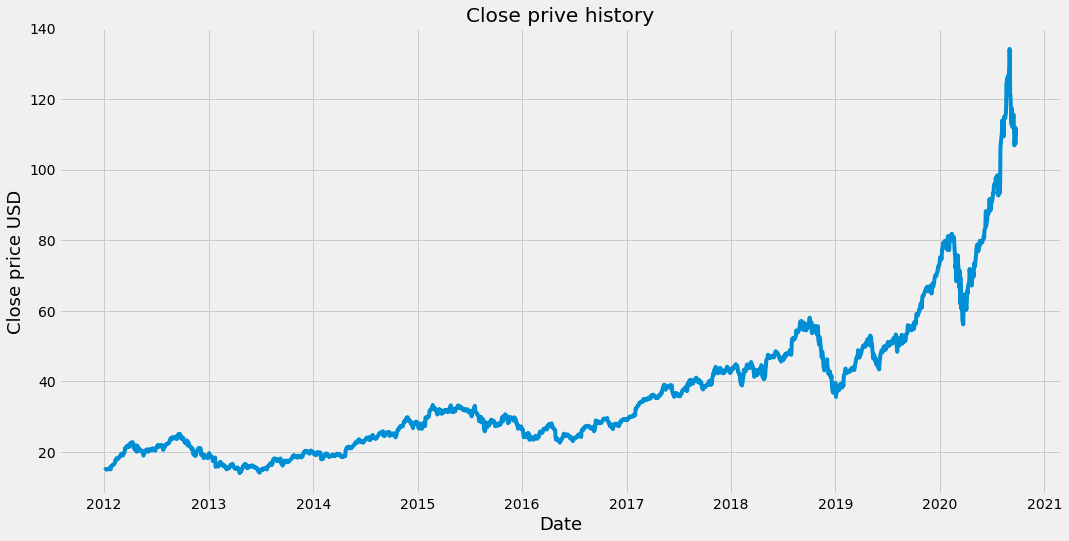

In [77]:
plt.figure(figsize=(16,8))
plt.title('Close prive history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD', fontsize=18)

In [78]:
plt.show()

In [79]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len


1757

In [80]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) 


In [81]:
scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.79955509],
       [0.81394385],
       [0.77493613]])

In [82]:
#Create training sample
#Create the scaled training set
training_data_len

train_data=scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train datasets
x_train=[]
y_train=[]
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [83]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np. array(x_train), np.array(y_train)

In [84]:
# reshape arrays to 3D
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1697, 60, 1)

In [85]:
# build the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [86]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1697/1697 [==============================] - 38s 23ms/step - loss: 2.9795e-04


In [88]:
#Create the testig data set
#Create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len-60:, :]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [89]:
# Convert the data to a numpy array
x_test =np.array(x_test)
#reshape
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [90]:
# get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)




In [91]:
#get the MSE error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.7648710802638721

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


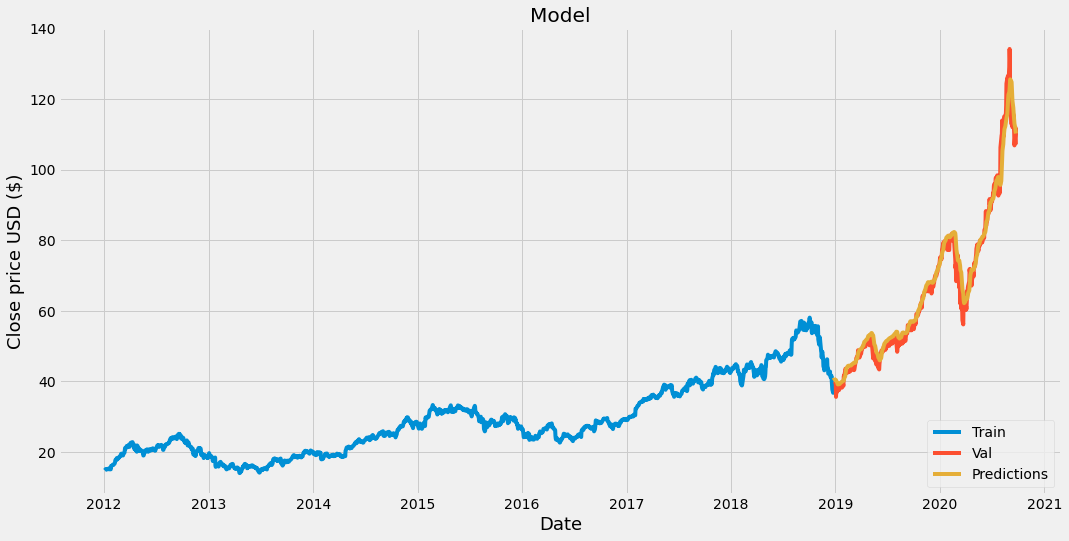

In [92]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

In [93]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-12-27,39.037498,40.976688
2018-12-28,39.057499,40.633053
2018-12-31,39.435001,40.415298
2019-01-02,39.480000,40.327732
2019-01-03,35.547501,40.328564
...,...,...
2020-09-17,110.339996,114.086349
2020-09-18,106.839996,113.026649
2020-09-21,110.080002,111.708504


In [96]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-09-22')
#create a new datafrime
new_df = apple_quote.filter(['Close'])
# get the last 60 day closing price values
last_60_days = new_df[-60:].values
#scale to be in [0, 1]
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list 
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
X_test =np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price =model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[110.21099]]


In [97]:
# get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-09-23', end='2020-09-23')
print(apple_quote2['Close'])


Date
2020-09-23    107.120003
Name: Close, dtype: float64
